<a href="https://colab.research.google.com/github/marianatmatos/data_science/blob/main/notebooks/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**

[![LinkedIn](https://img.shields.io/badge/linkedIn-MarianaMatos-blue.svg)](https://www.linkedin.com/in/mariana-matos-3ba384175/)
[![GitHub](https://img.shields.io/badge/GitHub-marianatmatos-green.svg)](https://github.com/marianatmatos)
[![](https://img.shields.io/badge/Medium-marianatmatos-blueviolet)](https://marianatmatos.medium.com/)

<p align="center">
  <img  height="300" src="http://blog.phonetrack.com.br/wp-content/uploads/2018/11/churn-rate-blog.png" >
</p>



## **The Problem**

Customer churn is one of the most important business metrics. A financial term that refers to the loss of a client that is, when a customer ceases to interact with a company or service. The full cost of customer churn includes both lost revenue and the marketing costs involved with replacing those customers with new ones. In other words, the cost of acquiring a new customer is significantly higher than retaining an existing one.

If we could figure out why a customer leaves and when they leave with reasonable accuracy, it would immensely help the organization to strategize their retention initiatives.

As a result, churn is one of the most important elements in the Key Performance Indicator (KPI) of a product or service. A full customer lifecycle analysis requires taking a look at retention rates in order to better understand the health of the business or product. 

## **The Strategy**

This analysis focuses on the behavior of telecom customers who are more likely to leave the services. The goal is find out the most remarkable behavior of customers through Exploratory Data Analysis and Feature Engineering then apply supervised machine learning algorithms and try to predic the customers who are most likely to churn.

## **The Data**

The data used in this project is available on [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn) platform, and deal with a typical problem for a telecom companies. This is known as a binary classification problem, where you have only two possible values for the dependent variable in this case, a customer either leaves the telecom service or doesn't.
Given that we have data on current and prior customer transactions in the telecom dataset, this is a standardized supervised classification problem that tries to predict a binary outcome (Y/N).



In [1]:
# Import necessarie libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import time

from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Data Pre-processing**

At this step we take a closer look at the dataset structure to better  understanding the input data. 

In [2]:
PATH = 'https://raw.githubusercontent.com/marianatmatos/data_science/main/datasets/customer_churn_data.csv'
df = pd.read_csv(PATH)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Look at numerical variables statistcs
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Let's take a look at our dataset and the numerical variables statistics. So we have 21 columns including our target variable **Churn**. 

The dataset contains numerical and categorical columns providing much information on the customer transactions. The dataset contains 7043 rows and 21 columns and there seem to be no missing values in the dataset.

A quick look at describe() method we can see that customers are paying an average of $65 per month and staying for 32 months.

In [5]:
# Check if there is missing data
df.isna().value_counts()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn
False       False   False          False    False       False   False         False          False            False           False         False             False        False        False            False     False             False          False           False         False    7043
dtype: int64

Now we are sure that there is no value missing and can move on to the next step: identify unique values

### Identify unique values

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

We can ignore for now 'CustomerID' - because all customers have different IDs and that's not going to influence the results - 'MonthlyCharges', 'TotalCharges' and the variables with only two unique values because we'll use Label Encoder later.


In [7]:
print('Multiple Lines: ', df['MultipleLines'].unique())
print('Internet Service: ',df['InternetService'].unique())
print('Online Security: ',df['OnlineSecurity'].unique())
print('Online Backup: ',df['OnlineBackup'].unique())
print('Device Protection: ',df['DeviceProtection'].unique())
print('Tech Support: ',df['TechSupport'].unique())
print('Streaming TV: ',df['StreamingTV'].unique())
print('Streaming Movies: ',df['StreamingMovies'].unique())
print('Contract: ' ,df['Contract'].unique())
print('Payment Method: ',df['PaymentMethod'].unique())


Multiple Lines:  ['No phone service' 'No' 'Yes']
Internet Service:  ['DSL' 'Fiber optic' 'No']
Online Security:  ['No' 'Yes' 'No internet service']
Online Backup:  ['Yes' 'No' 'No internet service']
Device Protection:  ['No' 'Yes' 'No internet service']
Tech Support:  ['No' 'Yes' 'No internet service']
Streaming TV:  ['No' 'Yes' 'No internet service']
Streaming Movies:  ['No' 'Yes' 'No internet service']
Contract:  ['Month-to-month' 'One year' 'Two year']
Payment Method:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


When we look into the unique values ​​in each categorical variable, we get an insight that the customers can choose to have no additional services, have them, or don't have internet service. They can go either on a month-to-month rolling contract or on a fixed contract for one / two years. Also, they are paying bills via credit card, bank transfer, or electronic checks.

### Target variable distribution


No     5174
Yes    1869
Name: Churn, dtype: int64


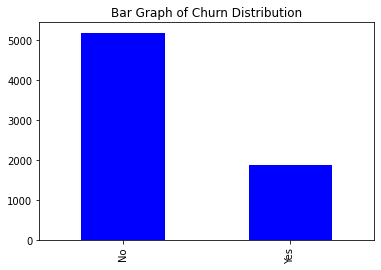

In [8]:
print(df['Churn'].value_counts())
df['Churn'].value_counts().plot(kind = 'bar', title = 'Bar Graph of Churn Distribution', color = 'blue', align = 'center')
plt.show()

As you can see above, the data set is imbalanced with a high proportion of active customers compared to their churned clients.

### Clean dataset

here we are going to convert TotalCharges column to numeric type, since the values in this columns are only numbers.

In [9]:
# Transform TotalCharges from categorical to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [10]:
# Fill missing values with mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean()).round(0)

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# Check variables types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Converting Categorical Columns to Numeric Columns

This is a very important stage of pre-processing the data. 

Since machine learning algorithms are based on mathematical equations keeping categorical data on the equation will cause problems given that we would only need numbers in the equations.

A nice way to solve this is encoding our categorical variables, for that we'll use Label Encoder - for numeric variables and create dummy variables.


In [13]:
# Label Encode binary categorical data

# Create label encoder object
enc = LabelEncoder()

# label encode columns with 2 or less unique value
enc_count = 0
for col in df.columns[1:]:
  if df[col].dtype == 'object':
    if len(list(df[col].unique())) <= 2:
        df[col] = enc.fit_transform(df[col])
        enc_count += 1
print('{} columns were label encoded.'.format(enc_count))

6 columns were label encoded.


In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,30.0,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1890.0,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.0,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1841.0,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,152.0,1


In [15]:
# One Hot Encode non-binary categorical data
cols_nbin = ['MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'Contract' , 'PaymentMethod' , 'StreamingMovies']
df_encoded = pd.get_dummies(df[cols_nbin])

df_clean = df.copy()

# Delete non binary columns 
df_clean = df_clean.drop(columns=['MultipleLines' , 'InternetService' , 'OnlineSecurity' , 'OnlineBackup' , 'DeviceProtection' , 'TechSupport' , 'StreamingTV' , 'Contract' , 'PaymentMethod' , 'StreamingMovies'])

df_clean = pd.concat([df_clean, df_encoded], axis = 1)

In [16]:
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,30.0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1890.0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1841.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,152.0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


### EDA

let's visualize the relation of the independent variable with the categorical variables using the 'df' dataset and maybe gain better insight for selecting the best features.

#### <u>Percentage of churn customers</u>

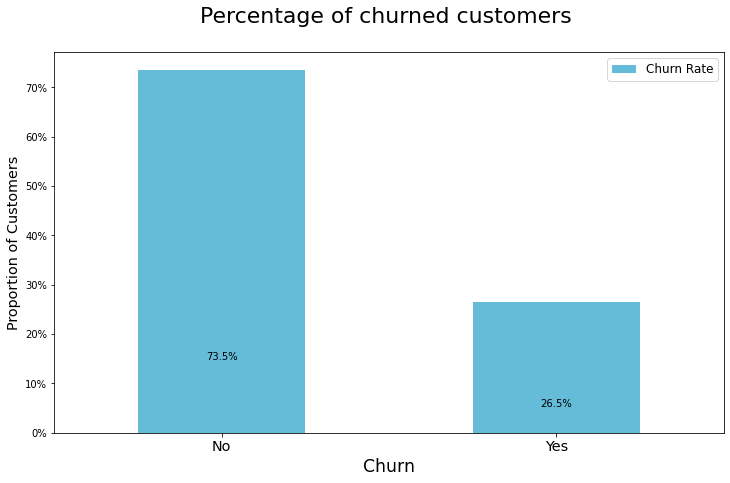

In [17]:
# Create variable with columns Churn and CustomerID

customer_churn = df[['Churn', 'customerID']]
customer_churn["churn_label"] = pd.Series(np.where((customer_churn["Churn"] == 0), "No", "Yes"))
sectors = customer_churn.groupby ("churn_label")
customer_churn = pd.DataFrame(sectors['customerID'].count())
customer_churn['Churn Rate'] = (customer_churn['customerID'] / sum(customer_churn['customerID']))*100

# Create ax object
ax =  customer_churn[["Churn Rate"]].plot.bar(legend =True, figsize =(12, 7), rot=0, color='#64BCD9')

# Customize
plt.title('Percentage of churned customers \n',horizontalalignment='center', fontsize='22')
plt.legend(loc='top right', fontsize='large')
plt.xlabel('Churn', horizontalalignment='center', fontsize='xx-large')
plt.ylabel('Proportion of Customers', horizontalalignment='center', fontsize='x-large')
plt.xticks(fontsize='x-large')
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Loop to add the percentage
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x ,y = p.get_xy()
  ax.annotate('{:.1f}%'.format(height), (x + width/2, y + height*0.2), ha='center')

The class is imbalanced with a high proportion of active customers compared to their churned counterparts.

#### <u>Histogram of numeric Columns </u>

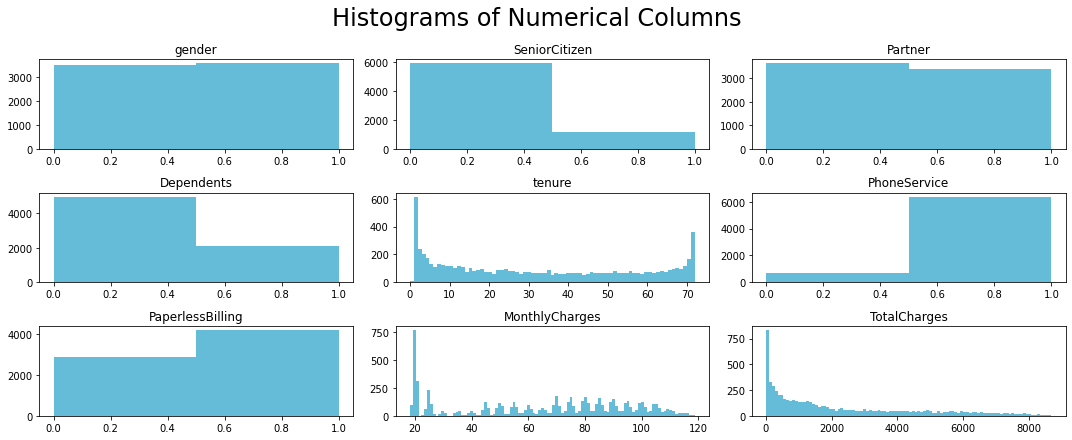

In [18]:
numerics = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling',
        'MonthlyCharges', 'TotalCharges']]

#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontsize = 24)
for i in range(numerics.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(numerics.columns.values[i])

    vals = np.size(numerics.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(numerics.iloc[:, i], bins=vals, color = '#64BCD9')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Some insights about the histograms:

* Gender distribution shows that the dataset features a relatively equal proportion of male and female customers

* Most of the customers (83%) are younger people;

* Not many customers seem to have dependents whilst almost half of the customers have a partner.

* Tenure shows that there are a lot of new customers (less than 10 months) followed by a loyal customer segment (Over 70 months);

* Over 90% of customers choose to have phone service;

*  2/3th of the customers have opted for paperless Billing

* Monthly charges span anywhere between 18 to 118 per customer with a huge proportion of customers in the $20 segment.

#### <u>Churn rate by Contract type</u>

As we can see, the majority of customers who opted for a two-year contract remained with the company. This can be a good metric.


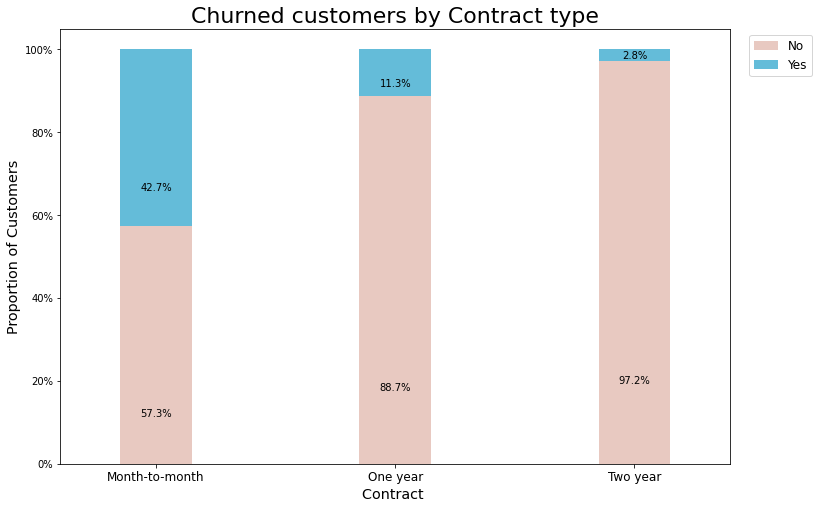

In [19]:
colors = ['#E8C9C1','#64BCD9']

# Create variable with the two columns contract and churn
contract_churn = df.groupby(['Contract','Churn']).size().unstack()
contract_churn.rename(columns={1:'Yes', 0:'No'}, inplace=True)

# Create ax objetct
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', figsize=(12,8),
                                                              width=0.3, color=colors, 
                                                              stacked=True, rot=0)

# Customize
plt.title('Churned customers by Contract type', fontsize=22)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='large')
plt.xlabel('Contract \n', fontsize='x-large')
plt.ylabel('Proportion of Customers', fontsize='x-large')
plt.xticks(fontsize='large')
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Loop to add the percentage
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x ,y = p.get_xy()
  ax.annotate('{:.1f}%'.format(height), (x + width/2, y + height*0.2), ha='center')

#### <u>Churned Customer by Payment Method</u>

Customers who opt for automatic payment tend to have a lower churn rate.

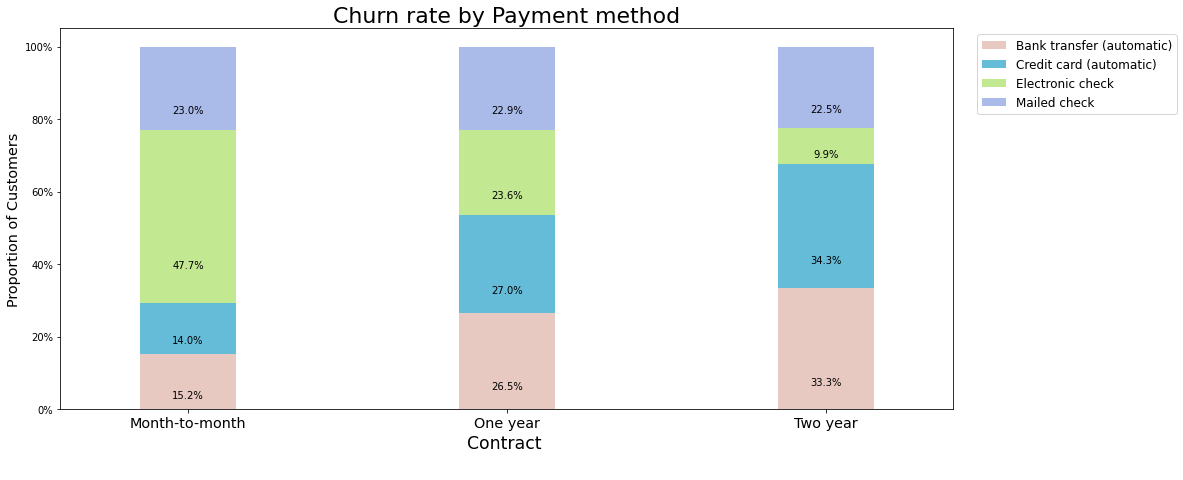

In [20]:
color = ['#E8C9C1','#64BCD9', '#C3E892', '#AABAE9' ]

# Create variable with columns Contract and PaymentMethod
contract_churn = df.groupby(['Contract','PaymentMethod']).size().unstack()

# Create ax object
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width=0.3, stacked=True, figsize=(16,7), rot=0, color=color)

# Customize
plt.title('Churn rate by Payment method', fontsize=22)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='large')
plt.xlabel('Contract \n', fontsize='xx-large')
plt.ylabel('Proportion of Customers', fontsize = 'x-large')
plt.xticks(fontsize='x-large')
plt.yticks(horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


# Loop to add the percentage
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x ,y = p.get_xy()
  ax.annotate('{:.1f}%'.format(height), (x + width/2, y + height*0.2), ha='center')

#### <u>Find positive and negative correlations with the Target Variable</u>


Partner, Dependents, and Tenure seem to be negatively related to churn but churn rate increases with monthly charges and paperless billing.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

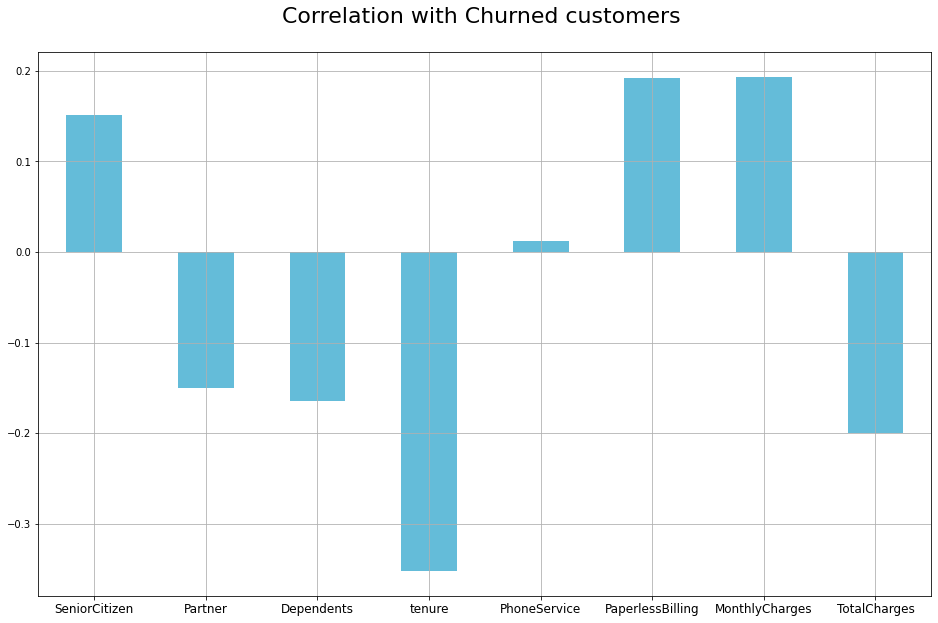

In [21]:
columns = df[['SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges']]

correlations = columns.corrwith(df.Churn)
correlations = correlations[correlations!=1]
correlations.plot.bar(figsize = (16, 10), grid=True, rot = 0, color='#64BCD9')

# Customize
plt.title('Correlation with Churned customers \n', fontsize = "22")
plt.xticks(fontsize='large')

#### <u>Detecting Multicollinearity with VIF</u>

Multicollinearity is the state where three or more variables are highly correlated and contain similar information about the variance within a given dataset. 

In order to detect some colinearity, we use Variance Inflation Factor (VIF) which is a measure of colinearity among predictor variables within a multiple regression.


In [22]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

columns = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges','TotalCharges']]

calc_vif(columns)

,variables,VIF
0,gender,1.921286
1,SeniorCitizen,1.327766
2,Partner,2.815272
3,Dependents,1.921208
4,tenure,10.549667
5,PhoneService,7.976386
6,PaperlessBilling,2.814160
7,MonthlyCharges,13.988649
8,TotalCharges,12.570269


We can see here that the ‘Monthly Charges’ and ‘Total Charges’ have a high variance inflation factor because they "explain" the same variance within this dataset.  To avoid the risk of reducing the precision of coefficients we 'll drop `TotalCharges`.

In [23]:
columns = df.drop(columns='TotalCharges')

columns = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling','MonthlyCharges']]

calc_vif(columns)

,variables,VIF
0,gender,1.879536
1,SeniorCitizen,1.323089
2,Partner,2.814574
3,Dependents,1.908533
4,tenure,3.287603
5,PhoneService,5.963240
6,PaperlessBilling,2.745897
7,MonthlyCharges,7.453993


The high variance inflation factor has decreased to a considerable extent. So we can move on and split out the dataset to create training and test sets.

####  <u>Concluding Remarks</u>

* The dataset is imbalanced with the majority of customers being active.

* Customers with a month-to-month contract have a very high probability to churn.

* Most of the customers seem to have phone service with Monthly charges spanning between 18 dollars to 118 dollars per customer. 

* There is multicollinearity between Monthly Charges and Total Charges.
After dropped Total Charges the VUF value has decreased considerably.

* Monthly Charges and Paperless Billing have a strongest positive correlation with the target feature whilst Tenure, Dependents and Partner have a negative correlation with the target feature - 

* There are a lot of new customers in the organization (less than 10 months old) followed by a loyal customer base that’s above 70 months old. 

### Data normalization

#### <u>separate target variable</u>

In [24]:
target = df_clean['Churn']
df_clean = df_clean.drop(columns='Churn')


#### <u>Split dataset & generate train e test datasets</u>


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_clean, target, stratify=target, test_size = 0.2, random_state = 0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 41)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 41)
Number transactions y_test dataset:  (1409,)


#### <u>Remove identifiers</u>

Separate ‘customerID’ from training and test data frames

In [26]:
train_id = X_train['customerID']
x_train = X_train.drop(columns=['customerID'], inplace=True)

test_id = X_test['customerID']
x_test = X_test.drop(columns=['customerID'], inplace=True)

#### <u>Scaling features to a range</u>

normalize the variables so that all the training and test variables are scaled within a range of 0 to 1.

In [27]:
sc_X = StandardScaler()

# Feature scaling X_train
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

# Feature scaling X_test
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_test2.columns = X_test.columns.values
X_test.index = X_test.index.values
X_test = X_test2 

## **Model Selection**

Let’s model each classification algorithm over the training dataset and evaluate their accuracy and standard deviation scores. Let's sort the results based on the Mean AUC.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

### Compare algorithms using accuracy and ROC AUC metrics 

To evaluate each model we are going to use K-Fold Cross-Validation, it will help us to fix the variance that occurs when we get good accuracy while running the model on a training set and a test set but the accuracy looks different when the model runs on another test set.

In order to fix the variance problem, k-fold cross-validation basically split the training set into 10 folds and train the model on 9 folds (9 subsets of the training dataset) before testing it on the test fold. This gives us the flexibility to train our model on all ten combinations of 9 folds; giving ample room to finalize the variance.

In [29]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced')))
models.append(('SVC', SVC(kernel='linear', random_state=0)))
models.append(('Kernel SVM', SVC(kernel='rbf', random_state=0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier(criterion='entropy', random_state=0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)))

# Evaluate model results
acc_results = []
auc_results = []
names = []
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD','Accuracy Mean', 'Accuracy STD']
models_result = pd.DataFrame(columns=col)
i = 0

# Evaluate each model using k-fold cross-validation
for name, model in models:
  kfold = KFold(n_splits=10, random_state=0)
  cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')

  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  models_result.loc[i] = [name, round(cv_auc_results.mean()*100, 2), round(cv_auc_results.std()*100, 2), round(cv_acc_results.mean()*100,2), round(cv_acc_results.std()*100,2)]
  i += 1

models_result.sort_values(by=['ROC AUC Mean'], ascending=False)


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,84.34,1.62,74.42,1.15
1,SVC,83.13,1.75,79.85,1.26
6,Random Forest,82.34,1.99,78.82,1.40
4,Gaussian NB,81.85,1.89,69.28,1.50
2,Kernel SVM,79.56,2.12,79.71,1.18
3,KNN,77.33,2.09,76.02,0.86
5,Decision Tree,66.48,2.42,73.43,1.74


From the first iteration Logistic Regression algortihm turn out to be the best, and SVC right behind. Let's run another iterations with other metrics. 

### Visualize algorithms comparison

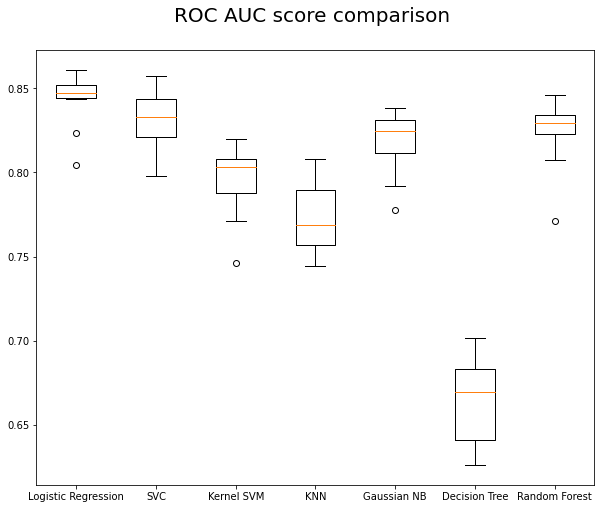

In [30]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.boxplot(x=auc_results)
plt.title('ROC AUC score comparison \n', fontsize='20')
ax.set_xticklabels(names)

plt.show()

We can see that Logistic Regression and SVC have outperformed the other five models.

### Compare algorithms using Accuracy, Precision, Recall, F1 and F2 score metrics (second iteration)

First, we will want to find the optimal K number for the KNN model and the optimal number of trees to apply to the Random Forest model.

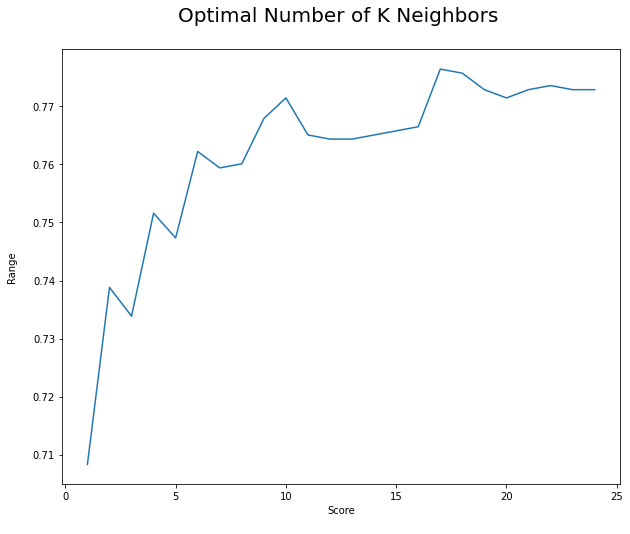

In [31]:
# Identify optimal number of K neighbors for KNN Model:
score_array = []
for each in range(1,25):
  knn_loop = KNeighborsClassifier(n_neighbors=each)
  knn_loop.fit(X_train, y_train)
  score_array.append(knn_loop.score(X_test, y_test))

# Visualize Optimal numbers of K Neighbors
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,25), score_array)

plt.ylabel('Range\n')
plt.xlabel('Score\n')
plt.title('Optimal Number of K Neighbors \n', fontsize = '20')

plt.show()
# Optimal number of K Neighbors = 18

The optimal number of K Neighbors is near 18, we are going to use this number in the second iteration.

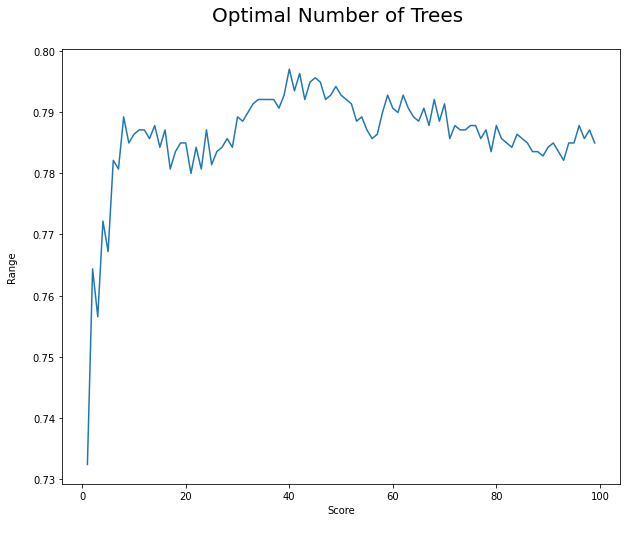

In [32]:
# Optimal number of trees for Random Forest Model
score_array = []
for each in range(1,100):
  rf_loop = RandomForestClassifier(n_estimators=each, random_state=1)
  rf_loop.fit(X_train, y_train)
  score_array.append(rf_loop.score(X_test, y_test))

# Visualize optimal number of trees 
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,100), score_array)

plt.ylabel('Range\n')
plt.xlabel('Score\n')
plt.title('Optimal Number of Trees \n', fontsize = '20')

plt.show()

#Optimal number of decision trees = 40

The optimal number of Trees is near 40, we are going to use this number in the second iteration.

Now, we are going to create a function to compare the performance of each classification algorithm.

* **Accuracy**: A ratio of correctly predicted observation to the total observations.

* **Precision**: The ratio of correctly predicted positive observations to the total predicted positive observations.

* **Recall**: The ratio of correctly predicted positive observations to all observations in actual class 1.

* **F1**: The weighted average of Precision and Recall, giving each the same weighting.

* **F2**: Gives less weight to precision and more weight to recall in the calculation of the score. 

In [33]:
# Compare algoritmhs
def compare_models(classifier):
  classifier.fit(X_train, y_train)
  y_hat = classifier.predict(X_test)

  # Evaluate results
  acc = accuracy_score(y_test, y_hat)
  prec = precision_score(y_test, y_hat)
  rec = recall_score(y_test, y_hat)
  f1 = f1_score(y_test, y_hat)
  f2 = fbeta_score(y_test, y_hat, beta=2.0)

  col = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1', 'F2 Score']
  results = pd.DataFrame([[classifier.__class__.__name__, acc, prec, rec, f1, f2 ]], columns=col)

  return results

In [34]:
lr = compare_models(LogisticRegression(random_state=0))
svc = compare_models(SVC(kernel='linear', random_state=0))
knn = compare_models(KNeighborsClassifier(n_neighbors=18, metric='minkowski', p=2))
svc_kernel = compare_models(SVC(kernel = 'rbf', random_state = 0))
gaussian = compare_models(GaussianNB())
decision_tree = compare_models(DecisionTreeClassifier(criterion='entropy', random_state = 0))
random_forest = compare_models(RandomForestClassifier(n_estimators=40,criterion='entropy', random_state=0))


In [35]:
frames = [lr, svc, knn, svc_kernel, gaussian, decision_tree, random_forest]
final_comparison = pd.concat(frames)

The fisrt SVC is linear and the second is the SVM Kernel

In [36]:
final_comparison.sort_values(['Precision', 'Recall', 'F2 Score'], ascending=False) 

,Model,Accuracy,Precision,Recall,F1,F2 Score
0,SVC,0.802697,0.650000,0.556150,0.599424,0.572687
0,LogisticRegression,0.801987,0.644377,0.566845,0.603129,0.580822
0,SVC,0.789922,0.632653,0.497326,0.556886,0.519553
0,RandomForestClassifier,0.787083,0.628472,0.483957,0.546828,0.507287
0,KNeighborsClassifier,0.775727,0.582857,0.545455,0.563536,0.552546
0,DecisionTreeClassifier,0.732434,0.496333,0.542781,0.518519,0.532808
0,GaussianNB,0.703336,0.467359,0.842246,0.601145,0.725806


In the first iteration, the Logistic Regression algorithm proved to be more effective, staying ahead of the SVC Linear by a few points. In the second iteration, the SCV Linear algorithm proved to be more effective in the Precision score, but the Linear Regression became more efficient in the Recall and F2 Score. So we are going to implement the Logistic Regression algorithm.

## **Model Evaluation**


In [37]:
# Train & Evaluate model
classifier = LogisticRegression(random_state = 0, penalty='l2')
classifier.fit(X_train, y_train)

# Predict the Test set results
y_hat = classifier.predict(X_test)

#Evaluate Model Results on Test Set:
acc = accuracy_score(y_test, y_hat )
prec = precision_score(y_test, y_hat )
rec = recall_score(y_test, y_hat )
f1 = f1_score(y_test, y_hat )
f2 = fbeta_score(y_test, y_hat, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0  Logistic Regression  0.801987   0.644377  0.566845  0.603129  0.580822


In [38]:
# Re-chack K-Fold Cross Validation
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print('Logistic Regression Classification Accuracy: %0.2f (+/- %0.2f)'  % (accuracies.mean(), accuracies.std() * 2))

Logistic Regression Classification Accuracy: 0.80 (+/- 0.04)


The k-fold Cross Validation results indicate that we would have an accuracy anywhere between 76% to 84% while running this model on any test set.

### Visualize Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

<Figure size 2016x1440 with 0 Axes>

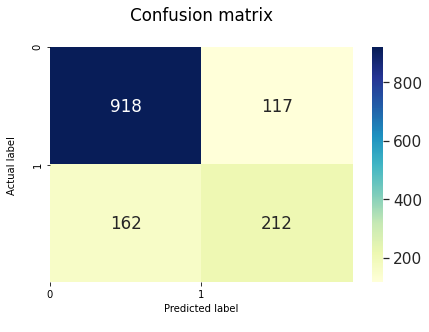

In [40]:
cm = confusion_matrix(y_test, y_hat) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))
fig, ax = plt.subplots()
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


plt.show()

The Confusion matrix indicates that we have 212+918 correct predictions and 162+117 incorrect predictions


### Pedict Feature importance

Feature importance indicates the relative importance of each feature when making a prediction. 

The scores can tell us a lot in a predictive modeling project:

* **provide insight into the dataset**: Highlight which features may be most relevant to the target and which features are the least relevant.

* **provide insight into the model**: The scores provide insights into which features are the most important and least important to the model when making a prediction

* **improve a predictive model**: Using the importance scores to selecting lowest scores features to delete or highest scores features to keep. Deleting features is called dimensionality reduction, and in some cases, improves the performance of the model. We won't be applying dimensionality reduction to this model.

since we are implementing the logistic regression algorithm, we will calculate simple coefficient statistics between each feature and the target variable.

In [41]:
importance = classifier.coef_[0]
feature_importances = pd.concat([pd.DataFrame(df_clean.drop(columns = ['customerID']).columns, columns = ["features"]),
           pd.DataFrame(np.transpose(importance), columns = ["coef"])],axis = 1,)
feature_importance_scores = feature_importances.sort_values("coef", ascending = False).reset_index()
feature_importance_scores

,index,features,coef
0,8,TotalCharges,0.673395
1,30,Contract_Month-to-month,0.314625
2,13,InternetService_Fiber optic,0.313501
3,6,PaperlessBilling,0.168015
4,29,StreamingTV_Yes,0.124398
5,15,OnlineSecurity_No,0.123156
6,39,StreamingMovies_Yes,0.120994
7,35,PaymentMethod_Electronic check,0.116749
8,24,TechSupport_No,0.101388
9,11,MultipleLines_Yes,0.078749


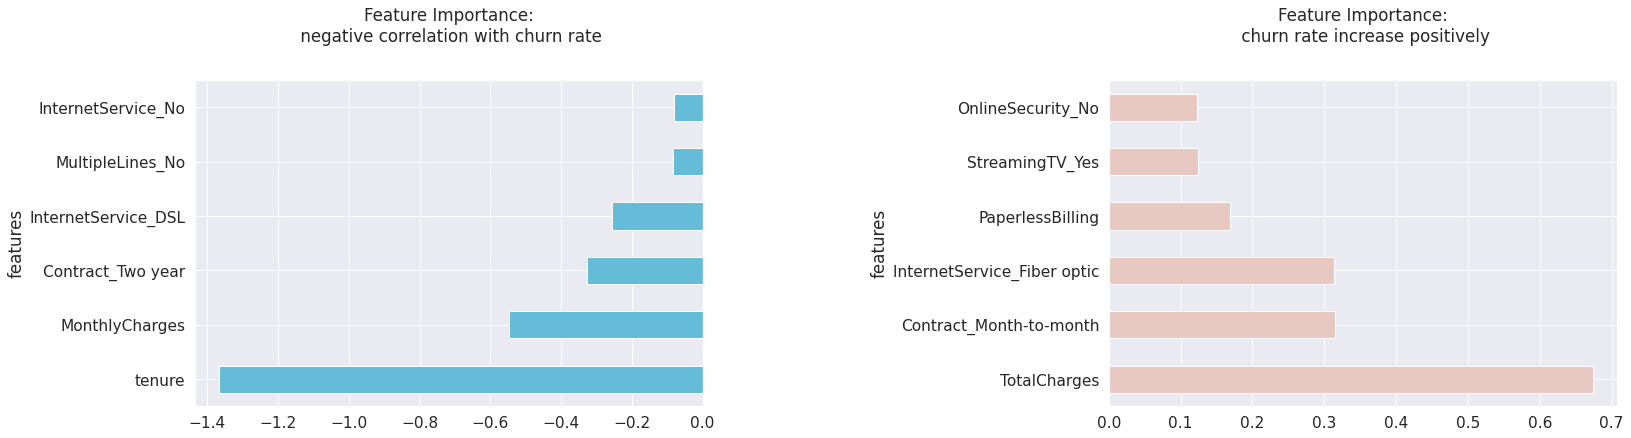

In [42]:
# Plot feature importance chart
fig = plt.figure(figsize=(10,6))
plt.subplots_adjust(right=2.1, wspace=0.8)

ax_1 = fig.add_subplot(121)
pd.Series(importance, index=feature_importances.features).nsmallest(6).plot.barh(color='#64BCD9')  
plt.title('Feature Importance:\n negative correlation with churn rate', y=1.1)

ax_2 = fig.add_subplot(122)
pd.Series(importance, index=feature_importances.features).nlargest(6).plot.barh(color='#E8C9C1')  
plt.title('Feature Importance:\n churn rate increase positively', y=1.1)

plt.show()

From these graphs, we can conclude that customers who choose the two-year contract, DSL internet service, do not opt ​​for internet service or multiple lines are more likely to remain as a company customer. Customers who opt for monthly contracts, fiber optics, electronic checks, and subscribing to the streaming service on TV are more likely to abandon the company's services.

## **Hyperparameter Tuning**

choosing the best parameters for the machine learning model. here are two types of parameters in any machine learning model — the first type are the kind of parameters that the model learns; the optimal values automatically found by running the model. The second type of parameters is the ones that user get to choose while running the model. Such parameters are called the hyperparameters

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

### Selecting best hyperparameters

In [44]:
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

# define grid search
param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# summarize results
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 506 tasks      | elapsed:   58.6s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.7min finished


Best Score:  0.8438153709161955
Best Params:  {'C': 1000, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}


Hyperparameter tuning improved the model from 80% to 84%. Next step is apply the best parameters and fit the model.

### Implementing best parameters

In [45]:
def get_cv_scores(classifier):
    scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='roc_auc')
    print('Cross Validation Mean: ', np.mean(scores))
    print('Standard Derivation: ', np.std(scores))

In [46]:
classifier = LogisticRegression(C=1000, class_weight={1: 0.5, 0: 0.5}, penalty='l2', solver='saga')
classifier.fit(X_train, y_train)

# Predict the Test set results
y_hat = classifier.predict(X_test)

#probability score
y_hat_prob = classifier.predict_proba(X_test)
y_hat_prob  = y_hat_prob [:, 1]

# summarize results
get_cv_scores(classifier)

Cross Validation Mean:  0.8438129483556391
Standard Derivation:  0.012852199160860575


A low standard deviation indicates that the values tend to be close the expected value of the set.

## **Final results**

Now that we have applied the best parameters for our logistic regression model, we will present the final results on a dataframe together with the probability of the client changing state (not churned and churned), the churn forecast for each client, and a ranking score for the clients. customers most likely to change state.


In [47]:
final_results = pd.concat([test_id, y_test], axis = 1).dropna()

final_results['predictions'] = y_hat 

final_results['propensity_to_convert(%)'] = y_hat_prob 

final_results['propensity_to_convert(%)'] = final_results["propensity_to_convert(%)"]*100

final_results['propensity_to_convert(%)'] = final_results["propensity_to_convert(%)"].round(2)

final_results['customerID'] = test_id

final_results['Churn'] = target

final_results = final_results[['customerID', 'Churn', 'predictions', 'propensity_to_convert(%)']]

final_results ['Ranking'] = pd.qcut(final_results['propensity_to_convert(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

In [48]:
final_results = final_results.sort_values(by=['Ranking'], ascending=False)
final_results.head(15)

,customerID,Churn,predictions,propensity_to_convert(%),Ranking
2246,7181-BQYBV,1,1,71.20,1
3431,2430-USGXP,1,1,67.64,1
4640,1853-UDXBW,1,1,66.96,1
6816,2446-PLQVO,1,1,70.21,1
80,5919-TMRGD,1,1,73.13,1
1423,0680-DFNNY,1,1,72.55,1
6837,6229-LSCKB,0,1,75.39,1
5159,5928-QLDHB,0,1,68.86,1
505,5609-CEBID,1,1,68.23,1
3510,3199-XGZCY,0,1,71.66,1


In [49]:
final_results.tail(10)

,customerID,Churn,predictions,propensity_to_convert(%),Ranking
984,8165-ZJRNM,0,0,0.22,10
981,1106-HRLKZ,0,0,0.71,10
5671,6370-ZVHDV,0,0,0.44,10
5740,8882-TLVRW,0,0,0.42,10
3176,5044-XDPYX,0,0,0.67,10
531,1403-GYAFU,0,0,0.14,10
266,6292-TOSSS,0,0,0.71,10
221,4443-EMBNA,0,0,0.28,10
6736,7558-IMLMT,0,0,0.25,10
5314,2535-PBCGC,0,0,1.04,10


## **Conclusions**

Our Exploratory Data Analysis (EDA) brought us real insights into the profile of the customer most likely to remain in the company's services and also the profile of the customer who is most likely to churn.

customer profile likely to remain in the company:

* two-year contract;
* DSL Internet service;
* do not opt ​​for internet service or multiple lines;

Customer profile more likely to churn:

* opt for monthly contracts;
* optical fiber;
* electronic checks;
* subscribe to the streaming service on TV

From these observations, the company's marketing team would organize a marketing campaign offering the company's customers some offer that contains the plans of the customer's profile likely to stay in the company.

In addition to the observations made at the EDA, our model also predicts, with a reasonable accuracy score of 84%, the likelihood of a certain customer converting the class they are in. e.g.: a customer who is prone to abandoning the company's services has a 65% chance of becoming a potential customer to remain hiring the company's services. This helps the marketing team to know which customers to focus their campaign on.

## **Thank You!**
[![](https://img.shields.io/badge/contributions-welcome-green.svg)](https://github.com/marianatmatos/data_science/issues)
[![](https://img.shields.io/badge/Medium-marianatmatos-blueviolet)](https://marianatmatos.medium.com/)
[![](https://img.shields.io/badge/linkedIn-marianatmatos-blue)](https://www.linkedin.com/in/mariana-matos-3ba384175/)

Thank you for your time and attention. I hope this was an informative and interesting project. If you have any questions or any kind of feedback, feel free to contact me on [LinkedIn](https://www.linkedin.com/in/mariana-matos-3ba384175/), and check out my other projects on [GitHub](https://github.com/marianatmatos).



## References

[Predict Customer Churn](https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7)

[Plot Graphs with %](https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot)

[Multicollinearity](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/)

[sklearn](https://scikit-learn.org/stable/modules/preprocessing.html)

[Hyperparameters](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/)

[Feature Importance](https://machinelearningmastery.com/calculate-feature-importance-with-python/)